# Importing and Understanding Data

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel('admit-per.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
GRE          298 non-null int64
TT           298 non-null int64
UNI_RANK     298 non-null int64
CGPA         298 non-null float64
ADMIT-PER    298 non-null float64
dtypes: float64(2), int64(3)
memory usage: 11.7 KB


In [8]:
df.head()

,GRE,TT,UNI_RANK,CGPA,ADMIT-PER
0,290,104,4,7.46,0.45
1,294,93,1,7.36,0.46
2,295,93,1,7.20,0.46
3,296,95,2,7.54,0.44
4,296,99,2,7.28,0.47


In [9]:
df.describe()

,GRE,TT,UNI_RANK,CGPA,ADMIT-PER
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,317.436242,107.936242,3.194631,8.643926,0.730671
std,11.429374,6.094041,1.167332,0.593312,0.143624
min,290.000000,93.000000,1.000000,6.800000,0.340000
25%,310.000000,104.000000,2.000000,8.220000,0.640000
50%,317.000000,108.000000,3.000000,8.645000,0.730000
75%,326.000000,112.000000,4.000000,9.100000,0.850000
max,340.000000,120.000000,5.000000,9.920000,0.970000


# Visualizing the Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

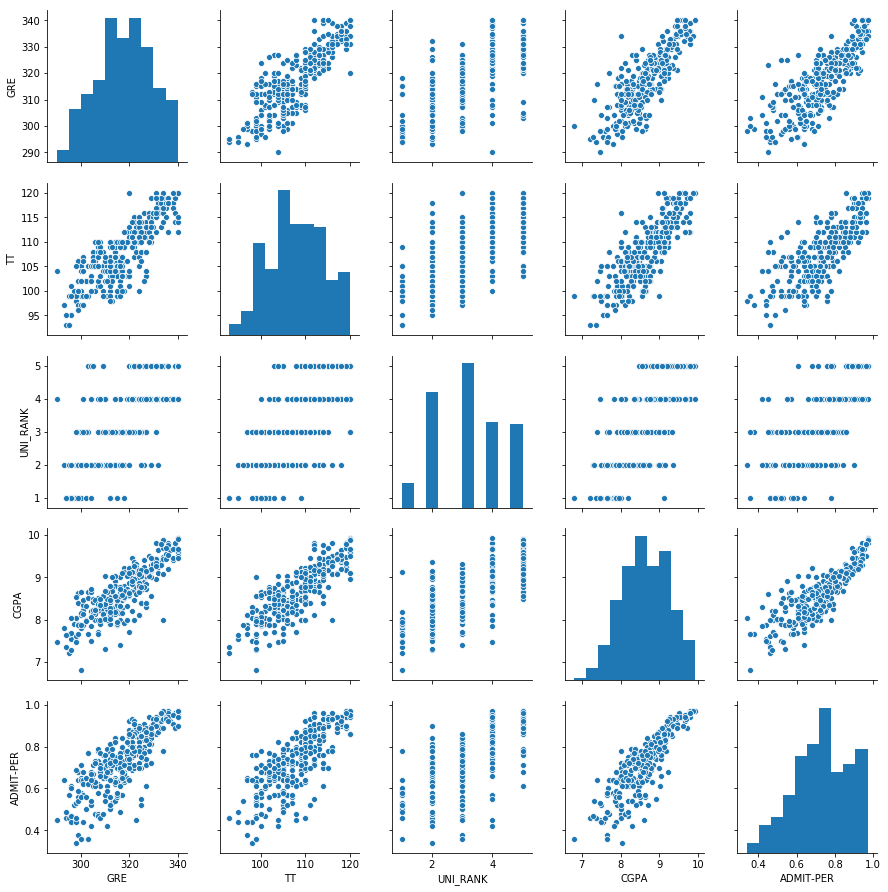

In [11]:
sns.pairplot(df)

C:\Users\Maltesh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


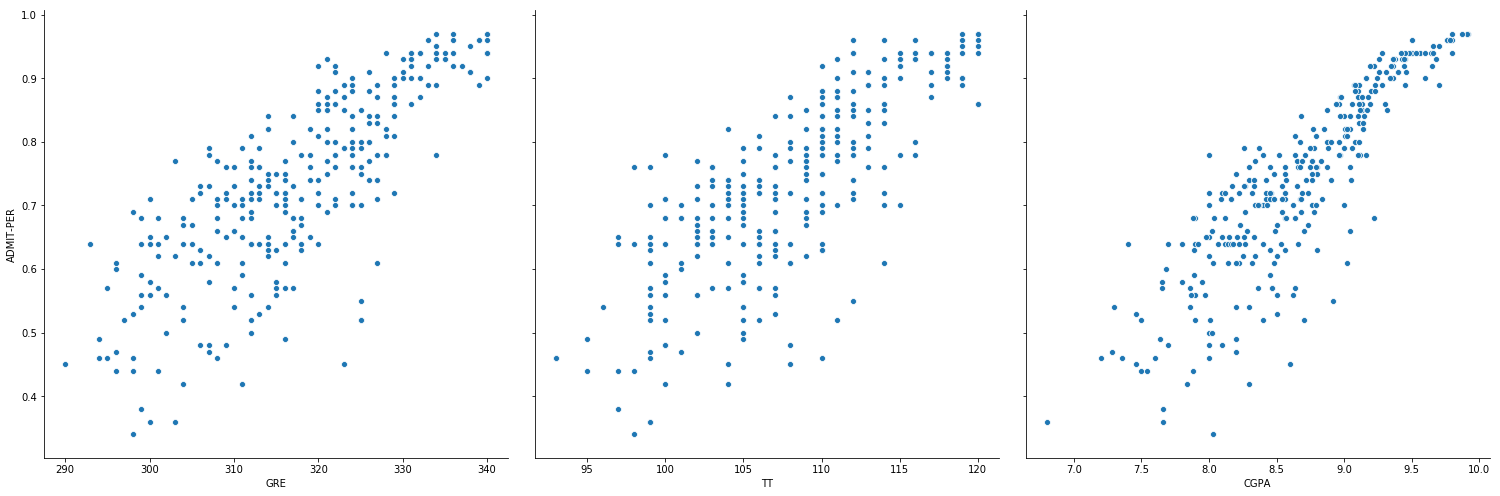

In [12]:
sns.pairplot(df, x_vars = ['GRE','TT','CGPA'], y_vars = 'ADMIT-PER', size = 7)

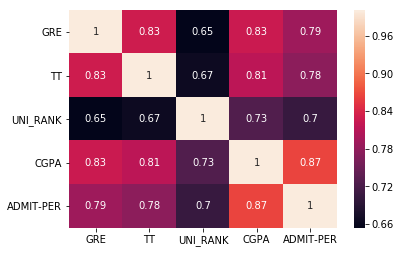

In [47]:
sns.heatmap(df.corr(), annot = True)

# Splitting Data For Training & Testing

In [13]:
x = df[['GRE','TT','CGPA']]
y = df['ADMIT-PER']

In [14]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 100)

C:\Users\Maltesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Applying Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [18]:
bo = lr.intercept_
print('Interncept bo = ',bo)

Interncept bo =  -1.5218920708022985


In [19]:
coef = pd.DataFrame(lr.coef_, x_test.columns, columns = ['Co-efficient'])

In [20]:
coef

,Co-efficient
GRE,0.001573
TT,0.003960
CGPA,0.153390


From above we can infer that : 
- If GRE increases by 1 then Admit-Per will be affected by 0.001573
- If TT increases by 1 then Admit-Per will be affected by 0.003960
- If CGPA increases by 1 then Admit-Per will be affected by 0.153390

# Predictions

In [21]:
y_pred = lr.predict(x_test)

In [34]:
len(x_test)

90

Text(0.5,0.98,'Actual vs Predicted')

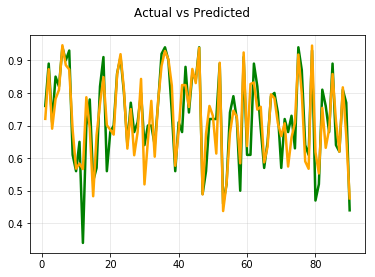

In [44]:
# Actual vs Predicted
fig = plt.figure()
c = [i for i in range(1,91,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5)
plt.plot(c,y_pred, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Actual vs Predicted')

# Calculating Error Terms

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print('Mean Square Error = ',mse)
print('R2 Error = ',r2)

Mean Square Error =  0.00442528152552705
R2 Error =  0.7626481572142351


Text(0.5,0.98,'Error Terms')

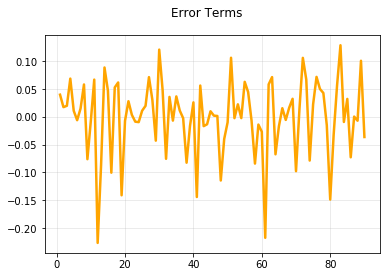

In [45]:
fig = plt.figure()
plt.plot(c,y_test-y_pred, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms')

# Statistical Information

In [24]:
import statsmodels.api as sm

In [25]:
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)
lml = sm.OLS(y_train, x_train_sm).fit()
lml.params

const   -1.521892
GRE      0.001573
TT       0.003960
CGPA     0.153390
dtype: float64

In [27]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:              ADMIT-PER   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           1.03e-65
Time:                        02:12:05   Log-Likelihood:                 259.79
No. Observations:                 208   AIC:                            -511.6
Df Residuals:                     204   BIC:                            -498.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5219      0.158     -9.637      0.0

# Re-Valuating the Data

If 'p > 0.05' for a 95% level of confidence:
- Ho : Value is not significant
- H1 : Value is significant
Since in GRE p(0.065) > 0.05 so 'we fail to reject Ho' 

Trying the model without GRE column

In [48]:
x_new = df[['TT','CGPA']]
y_new = df['ADMIT-PER']

In [49]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new,y_new, train_size = 0.7, random_state = 100)

In [50]:
lr.fit(x_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
y_pred_new = lr.predict(x_test_new)

Text(0.5,0.98,'Actual vs Predicted')

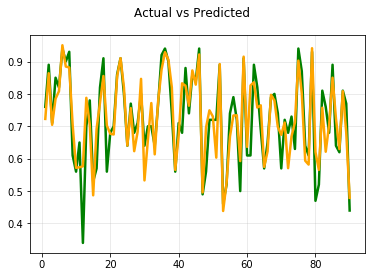

In [52]:
# Actual vs Predicted after removing GRE
fig = plt.figure()
c = [i for i in range(1,91,1)]
plt.plot(c,y_test_new, color = 'green', linewidth = 2.5)
plt.plot(c,y_pred_new, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Actual vs Predicted')

In [53]:
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

In [54]:
print('Mean Square Error = ',mse_new)
print('R2 Error = ',r2_new)

Mean Square Error =  0.00467395620491466
R2 Error =  0.7493103858054933


Text(0.5,0.98,'Error Terms')

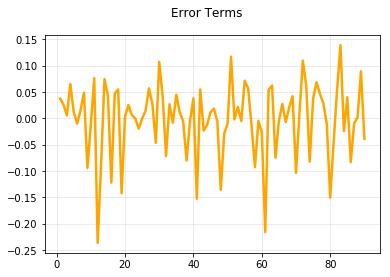

In [55]:
fig = plt.figure()
plt.plot(c,y_test_new-y_pred_new, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms')

In [56]:
x_train_sm_new = x_train_new
x_train_sm_new = sm.add_constant(x_train_sm_new)
lml = sm.OLS(y_train_new, x_train_sm_new).fit()
lml.params

const   -1.277949
TT       0.005286
CGPA     0.166433
dtype: float64

In [57]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:              ADMIT-PER   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     344.6
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           2.69e-66
Time:                        02:45:29   Log-Likelihood:                 258.05
No. Observations:                 208   AIC:                            -510.1
Df Residuals:                     205   BIC:                            -500.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2779      0.088    -14.535      0.0

Therefore the equation will look like : 
- y = bo      + (b1 * x1) + (b2 * x2)
- y = -1.2779 + (0.0053 * TT) + (0.1664 * CGPA)